<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Filter-for-relevant-background-comparison-and-check-with-volcano-plot" data-toc-modified-id="Filter-for-relevant-background-comparison-and-check-with-volcano-plot-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Filter for relevant background comparison and check with volcano plot</a></span></li><li><span><a href="#Falsly-identified-prenylated-proteins" data-toc-modified-id="Falsly-identified-prenylated-proteins-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Falsly identified prenylated proteins</a></span><ul class="toc-item"><li><span><a href="#Clean-all-lists-of-identified-proteins-by-removing-the-false-positives-and-save-them" data-toc-modified-id="Clean-all-lists-of-identified-proteins-by-removing-the-false-positives-and-save-them-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Clean all lists of identified proteins by removing the false positives and save them</a></span></li><li><span><a href="#Fractions-of-false-positives-in-all-identified-proteins" data-toc-modified-id="Fractions-of-false-positives-in-all-identified-proteins-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Fractions of false positives in all identified proteins</a></span></li></ul></li><li><span><a href="#Check-if-number-of-false-positives-corresponds-to-general-expectation-of-proteins-without-any-cysteine-or-is-less" data-toc-modified-id="Check-if-number-of-false-positives-corresponds-to-general-expectation-of-proteins-without-any-cysteine-or-is-less-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Check if number of false positives corresponds to general expectation of proteins without any cysteine or is less</a></span></li><li><span><a href="#Identified-prenylated-proteins" data-toc-modified-id="Identified-prenylated-proteins-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Identified prenylated proteins</a></span><ul class="toc-item"><li><span><a href="#New-identified-prenylated-proteins" data-toc-modified-id="New-identified-prenylated-proteins-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>New identified prenylated proteins</a></span></li><li><span><a href="#Known-identified-prenylated-proteins" data-toc-modified-id="Known-identified-prenylated-proteins-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Known identified prenylated proteins</a></span></li><li><span><a href="#All-identified-prenylated-proteins" data-toc-modified-id="All-identified-prenylated-proteins-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>All identified prenylated proteins</a></span></li></ul></li><li><span><a href="#Pre-processing-of-disulfide-bonds-output-.csv-file-from-UniProt" data-toc-modified-id="Pre-processing-of-disulfide-bonds-output-.csv-file-from-UniProt-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Pre-processing of disulfide bonds output .csv file from UniProt</a></span></li></ul></div>

In [ ]:
import sys
import os
import session_info

# Add the '0_functions' folder to sys.path
sys.path.append(os.path.join(os.getcwd(), '..', '0_functions'))

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import hypergeom
from functions import fishers_exact_test
from functions import preprocess
from functions import read_fastafile
from functions import percent
from functions import clean_agg

In [2]:
# Display session information
session_info.show()

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [4]:
datafolder = 'data'
figures = 'data/figures'
known_proteins_datafolder = '../Known_prenylated_proteins/data'

In [5]:
# Load data
F_FAZ_only = pd.read_csv(os.path.join(datafolder, 'Click-it_GG_F', 'Th1_FTI_results_Faz_only.tsv'), sep='\t')

# All known prenylated proteins
all_UP = pd.read_csv(os.path.join(known_proteins_datafolder, 'known_proteins', 'known_all.csv'), sep=';')

# Filter for relevant background comparison and check with volcano plot

In [6]:
# Filter for negative ratio und significant TRUE
F_FAZ_only = F_FAZ_only[F_FAZ_only['significant'] == True]
F_FAZ_only = F_FAZ_only[F_FAZ_only['FTI_Faz_vs_cntr_Faz_ratio'] < 0].reset_index(drop=True)

In [7]:
# rename
all_found = F_FAZ_only['ID']

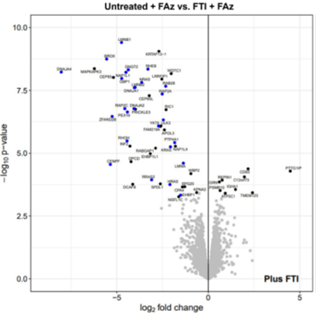

# Falsly identified prenylated proteins

In [8]:
# Get the sequences of all identified proteins in FASTA format
# create uniprot sparql readable input for all identified proteins
up_input = ' '.join([s for s in all_found])

In [9]:
# FASTA file of all identified proteins, downloaded from uniprot 
sequences = read_fastafile(os.path.join(datafolder, 'fasta_files', 'idmapping_2024_01_16_identified_proteins.fasta'))

In [10]:
# save all proteins that don't have a C in their sequence to a new df called no_C
no_C = sequences[~sequences['seq'].str.contains('C')]
no_C.reset_index(drop=True, inplace=True)

print('Number of identified proteins without cysteine:', len(no_C))

Number of identified proteins without cysteine: 1


In [11]:
# Are they really false positives or is there an isoform with a cysteine?
# Look for C in the isoforms of these proteins

' '.join([s for s in no_C['ID']])

'Q9UNZ2'

In [12]:
iso = read_fastafile(os.path.join(datafolder, 'fasta_files', 'idmapping_2024_01_16_identified_false_p.fasta'))

# checks for C occurence, so we get the proteins that do contain a C in ore or more isoforms and therefore aren't false positive
true_p_iso = iso[iso['seq'].str.contains('C')].reset_index(drop=True)

print('Found isoforms that do contain a cysteine:')
true_p_iso

Found isoforms that do contain a cysteine:


,ID,seqID,seq,len


## Clean all lists of identified proteins by removing the false positives and save them

In [13]:
# remove all proteins w/o cysteine from fasta file
sequences = sequences[~sequences['ID'].isin(no_C['ID'])]

#save
sequences.to_csv(os.path.join(datafolder, 'identified_proteins', 'clean_fasta_seqs_identified_prots.csv'), sep=',', index=False)

In [14]:
# remove rows where ID is in list of proteins that are false positives to get clean dataframes

false_p = iso[~iso['seq'].str.contains('C')]
false_p = false_p[~false_p['ID'].str.contains('-')].reset_index(drop=True)
false_p = false_p[~false_p['ID'].isin(true_p_iso['ID'])].reset_index(drop=True)

clean_F_FAZ_only = F_FAZ_only[~F_FAZ_only['ID'].isin(false_p['ID'])].reset_index(drop=True)

#save
clean_F_FAZ_only.to_csv(os.path.join(datafolder, 'Click-it_GG_F', 'clean_F_FAZ_only.csv'), sep=',', index=False)

In [15]:
all_found = {item for item in all_found if item not in false_p['ID'].tolist()}

## Fractions of false positives in all identified proteins

In [16]:
print('Percentage of false positive in all identified proteins: ', round(percent(len(false_p.index), 50), 2), '% (',
      len(false_p.index), ' of ', 50, ')', sep='')

Percentage of false positive in all identified proteins: 2.0% (1 of 50)


# Check if number of false positives corresponds to general expectation of proteins without any cysteine or is less

In [17]:
# proteins without cysteine in the human proteome, 26.09.23
# canonical sequences only

# Number of all identified prenylated proteins: before removing false positives

[M, n, N] = [25866 , 1479, 50]

# M = size of human proteome
# n = number of all proteins without a cystein in the human proteome
# N = all identified proteins

In [18]:
# -> We have a collection of 25866 proteins in the human proteome, of which ca. 1100 don't contain a cysteine.
# We want to know the probability of finding a given number of proteins without C if we choose at random N of 
# the 25866 human proteins.

rv = hypergeom(M, n, N)
x = np.arange(0, n+1)

pmf_false_p = rv.pmf(x)

print('Expected number of false positives:', np.argmax(pmf_false_p))
print('Actual number of false positives:', len(false_p))

Expected number of false positives: 2
Actual number of false positives: 1


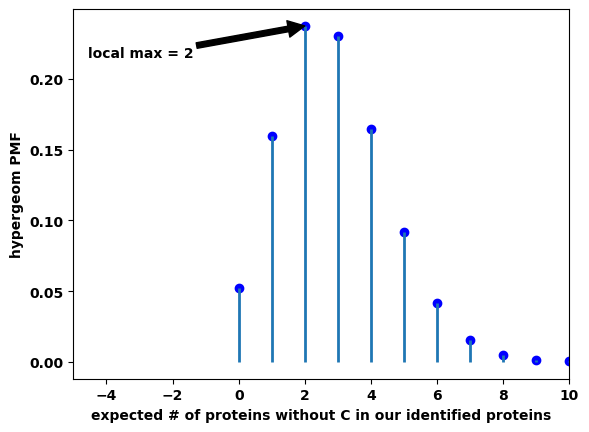

In [19]:
# Figure of most likely amount of proteins without cysteines in all identified proteins

fig, ax = plt.subplots()
ax.plot(x, pmf_false_p, 'bo')
ax.vlines(x, 0, pmf_false_p, lw=2)
plt.xlim(-5, 10)
ax.set_xlabel('expected # of proteins without C in our identified proteins')
ax.set_ylabel('hypergeom PMF')

ax.annotate('local max = 2', xy=(np.argmax(pmf_false_p), pmf_false_p[np.argmax(pmf_false_p)]), xycoords='data',
            xytext=(0.03, 0.9), textcoords='axes fraction',
            va='top', ha='left',
            arrowprops=dict(facecolor='black', shrink=0.001))

# save
plt.savefig(os.path.join(figures, 'hyper_false_p.png'))

plt.show()

In [20]:
#  Fisher’s Exact Test

p_value = fishers_exact_test(len(false_p), N, n, M)

# h0: proteins with no C are equally likely in both groups (independence)
# OR: There is no difference in the proportion of proteins with no C in both groups
# OR: A random table would have the probability of equal or less than the input table

# hA: The variables are not independent (one proportion is different to the other)
# OR: The the proportions of no C proteins are not equivalent in both groups

print('The difference between actual and expected amount of proteins without cysteines has a p-value=', 
      round(p_value, 2), '. \nWe have less false positives in the identified prenylated proteins than expected.', sep='')

The difference between actual and expected amount of proteins without cysteines has a p-value=0.37. 
We have less false positives in the identified prenylated proteins than expected.


# Identified prenylated proteins

## New identified prenylated proteins

In [21]:
# To gain more knowledge about the identified prenylated proteins, they will also be searched in UniProt and the same variables 
# as in 'uniprot_ext' are saved in 'new_all_ext'

In [22]:
# Of all identified proteins, keep only those IDs not present in known prenylated proteins list
new_all = [x for x in all_found if x not in list(set(all_UP['ID']))]

print('All newly identified prenylated proteins:', len(new_all))

All newly identified prenylated proteins: 18


In [23]:
# create uniprot sparql readable input for all found proteins that were not previously know to be prenylated
up_input = ' '.join(['uniprotkb:' + str(s) for s in new_all])

In [24]:
# load sparqle query2 results
new_all_ext = pd.read_csv(os.path.join(datafolder, 'UniProt_SPARQL_queries', 'up_output_new_proteins_16.01.23.csv'), sep=';')

In [25]:
# Preprocess raw UniProt output
new_all_ext = preprocess(new_all_ext)
new_all_ext = new_all_ext[new_all_ext['ID'].isin(pd.Series(new_all))]

new_all_ext = new_all_ext.groupby('ID').agg(set).reset_index()
new_all_ext = clean_agg(new_all_ext)

C:\Users\ale\DataspellProjects\Prenylation_manuscript_pmc_biology\Th1_FTI_results_Faz_only\functions.py:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  any_df['substrate'][i] = re.sub(combined_pat, '', sub)
C:\Users\ale\DataspellProjects\Prenylation_manuscript_pmc_biology\Th1_FTI_results_Faz_only\functions.py:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  any_df['substrate'][i] = re.sub(combined_pat, '', sub)
C:\Users\ale\DataspellProjects\Prenylation_manuscript_pmc_biology\Th1_FTI_results_Faz_only\functions.py:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the 

In [26]:
# Initialize motif column with 0
new_all_ext['motif'] = np.nan

# Initialize pep column with 0
new_all_ext['pep'] = np.nan

# Initialize Exp moiety column with 0
new_all_ext['Exp_moiety'] = 0

for ID in new_all_ext['ID']:
    if ID in list(all_found):
        new_all_ext.loc[new_all_ext['ID'] == ID, 'Exp_moiety'] = "S-farnesyl cysteine"
#save
new_all_ext.to_csv(os.path.join(datafolder, 'identified_proteins', 'identified_novel.csv'), sep=',', index=False)

## Known identified prenylated proteins

In [27]:
identified_known = all_UP[all_UP['ID'].isin(all_found)].reset_index(drop=True)

In [28]:
# Initialize Exp moiety column with 0
identified_known['Exp_moiety'] = 0

for ID in identified_known['ID']:
    if ID in list(all_found):
        identified_known.loc[identified_known['ID'] == ID, 'Exp_moiety'] = "S-farnesyl cysteine"

In [29]:
#save
identified_known.to_csv(os.path.join(datafolder, 'identified_proteins', 'identified_known.csv'), sep=',', index=False)

## All identified prenylated proteins

In [30]:
identified_all = pd.concat( [new_all_ext, identified_known], ignore_index=True)

#save
identified_all.to_csv(os.path.join(datafolder, 'identified_proteins', 'identified_all.csv'), sep=',', index=False)

# Pre-processing of disulfide bonds output .csv file from UniProt

In [31]:
# identified prenylated proteins

In [32]:
up_input = ' '.join(['uniprotkb:' + str(s) for s in all_found])

In [33]:
# clean SPARQL output

#bonded = pd.read_csv(os.path.join(datafolder, 'UniProt_SPARQL_queries', 'up_output_multi_disulfid_16.01.23.csv'), sep=';')

#bonded = bonded.dropna().reset_index(drop=True).rename(columns={'primaryAccession': 'ID', 'index': 'bond_Cpos'})

#for i, m in enumerate(bonded['bond_Cpos']):
    #bonded['bond_Cpos'][i] = re.sub(r'\^.*', '', str(m))

# remove unreliable entries
#bonded = bonded.loc[bonded['evidenceCode'] != 'ECO_0000250']
#bonded = bonded.drop(['evidenceCode'], axis=1).reset_index(drop=True)

#bonded.to_csv(os.path.join(datafolder, 'UniProt_SPARQL_queries', 'up_output_multi_disulfid_16.01.23.csv'), sep=';', index=False)